In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [14]:
# Load the dataset
df = pd.read_csv('Hypertension-risk-model-main.csv')

In [15]:
# Data Preprocessing
# Handle missing values
df.fillna(df.median(), inplace=True)

In [16]:
# Encode categorical variables
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [17]:
# Define features and target
X = df.drop('Risk', axis=1)
y = df['Risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Feature Selection and Dimensionality Reduction
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [20]:
# Sequential Feature Selection
sfs = SFS(LinearRegression(), n_features_to_select=10, direction='forward')
sfs.fit(X_train, y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

In [21]:
# Model Development
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

In [22]:
# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

In [23]:
# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

In [24]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
kmeans_labels = kmeans.predict(X_test)

In [25]:
# Model Evaluation
# Collect results in a DataFrame
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'MSE': [lr_mse, ridge_mse, lasso_mse],
    'R^2': [lr_r2, ridge_r2, lasso_r2]
})


In [26]:
# Interpretation and Insights
feature_importances_lr = pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False)
feature_importances_ridge = pd.Series(ridge_cv.best_estimator_.coef_, index=X.columns).sort_values(ascending=False)
feature_importances_lasso = pd.Series(lasso_cv.best_estimator_.coef_, index=X.columns).sort_values(ascending=False)


In [27]:
# Display results
results

,Model,MSE,R^2
0,Linear Regression,0.489975,0.498800
1,Ridge Regression,0.489973,0.498802
2,Lasso Regression,0.514904,0.473300


In [30]:
# Print the results
print("Model Performance Comparison:")
print(f"Linear Regression: MSE = {lr_mse:.4f}, R^2 = {lr_r2:.4f}")
print(f"Ridge Regression: MSE = {ridge_mse:.4f}, R^2 = {ridge_r2:.4f}")
print(f"Lasso Regression: MSE = {lasso_mse:.4f}, R^2 = {lasso_r2:.4f}")

# Determine the best model
best_model = None
if lr_r2 > ridge_r2 and lr_r2 > lasso_r2:
    best_model = "Linear Regression"
elif ridge_r2 > lr_r2 and ridge_r2 > lasso_r2:
    best_model = "Ridge Regression"
else:
    best_model = "Lasso Regression"

print(f"\nThe best model overall is: {best_model}")


Model Performance Comparison:
Linear Regression: MSE = 0.4900, R^2 = 0.4988
Ridge Regression: MSE = 0.4900, R^2 = 0.4988
Lasso Regression: MSE = 0.5149, R^2 = 0.4733

The best model overall is: Ridge Regression


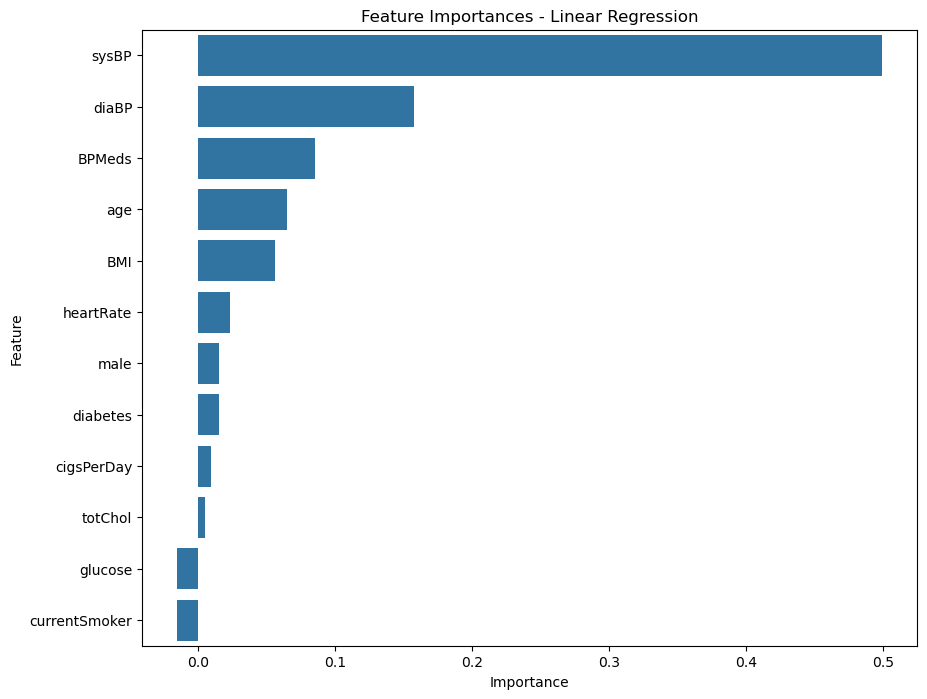

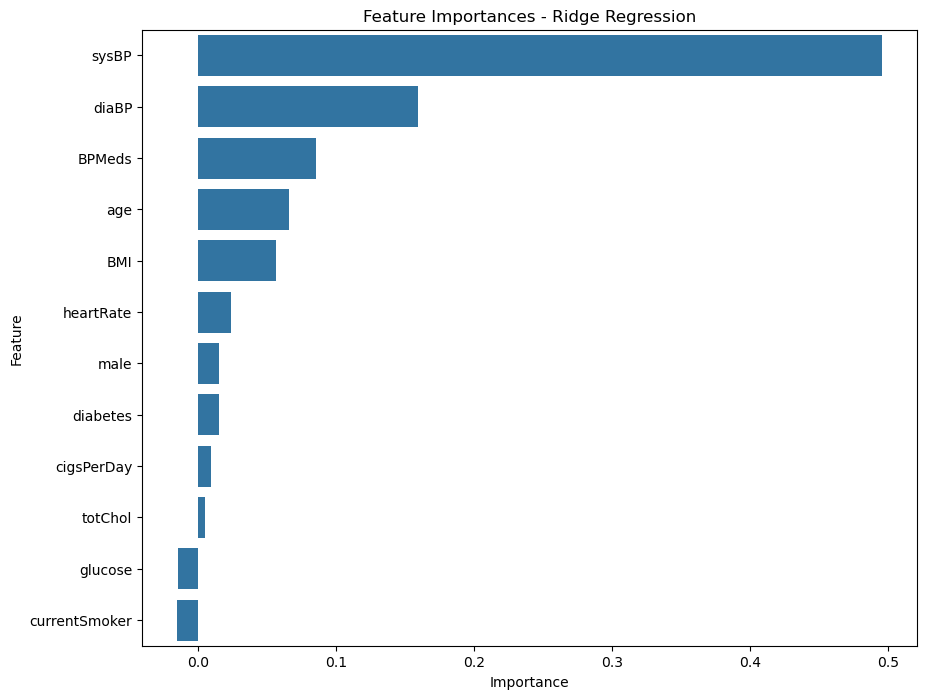

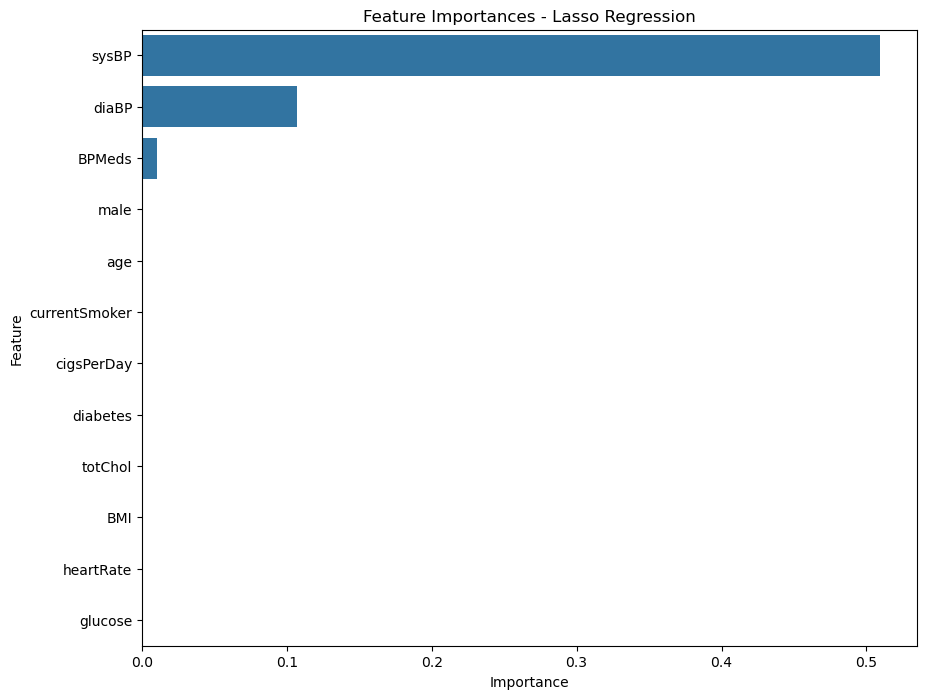

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot feature importances
def plot_feature_importances(importances, title):
    plt.figure(figsize=(10, 8))
    sns.barplot(x=importances.values, y=importances.index)
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Plot feature importances for Linear Regression
plot_feature_importances(feature_importances_lr, 'Feature Importances - Linear Regression')

# Plot feature importances for Ridge Regression
plot_feature_importances(feature_importances_ridge, 'Feature Importances - Ridge Regression')

# Plot feature importances for Lasso Regression
plot_feature_importances(feature_importances_lasso, 'Feature Importances - Lasso Regression')
